# Import JSON Database containing 5SS mechanisms

In [1]:
import json
with open('database5SS.txt') as f:
    json_data = json.load(f)
#print(json.dumps(json_data, indent=4))

# Create numpy arrays for data

In [2]:
import numpy as np

MechList=[];
CplrPathList=[];
for d in json_data:
    MechList.append(np.asarray(d["Mech"]))
    CplrPathList.append(np.asarray(d["CplrPath"]))

# Plot sample Coupler curve data

In [3]:
#%matplotlib inline
%matplotlib notebook

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from IPython import display
from numpy import linalg as LA

def plotXYZ(center, RotMat, ax):
    C=np.vstack((center,center,center))
    R=RotMat
    r=(1,0,0)
    g=(0,1,0)
    b=(0,0,1)
    ax.quiver(C[:,0], C[:,1], C[:,2], R[:,0], R[:,1], R[:,2],color=(r,g,b,r,r,g,g,b,b))

<IPython.core.display.Javascript object>


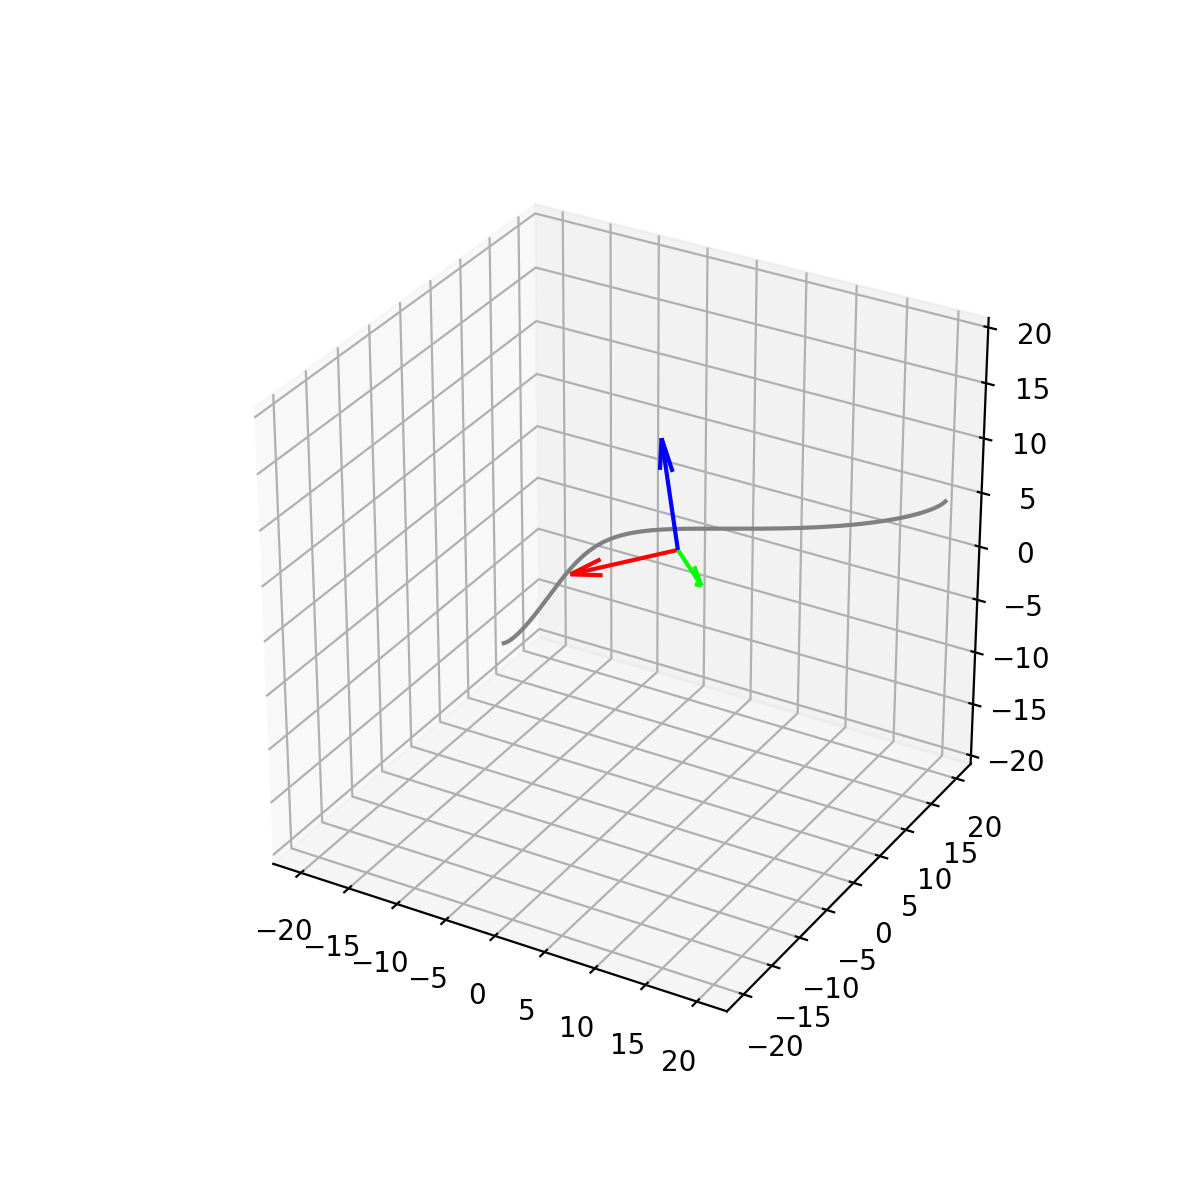

In [4]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
Path1=CplrPathList[6]
xline=Path1[:,0]
yline=Path1[:,1]
zline=Path1[:,2]
ax.plot3D(xline, yline, zline, 'gray')
limit=20
ax.auto_scale_xyz([-limit, limit], [-limit, limit], [-limit, limit])

C=np.mean(Path1,axis=0)
Covariance_Mat=np.cov(Path1,rowvar=0)
sing_vec=LA.svd(Covariance_Mat)[0]
R=sing_vec.T*10
plotXYZ(C, R, ax)

# Normalize Data (Translation,Rotation, Scaling)

- Translation: Average of all points moved to origin.
- Rotation: Principal axes rotated to align with x-axis
- Scaling:

<IPython.core.display.Javascript object>


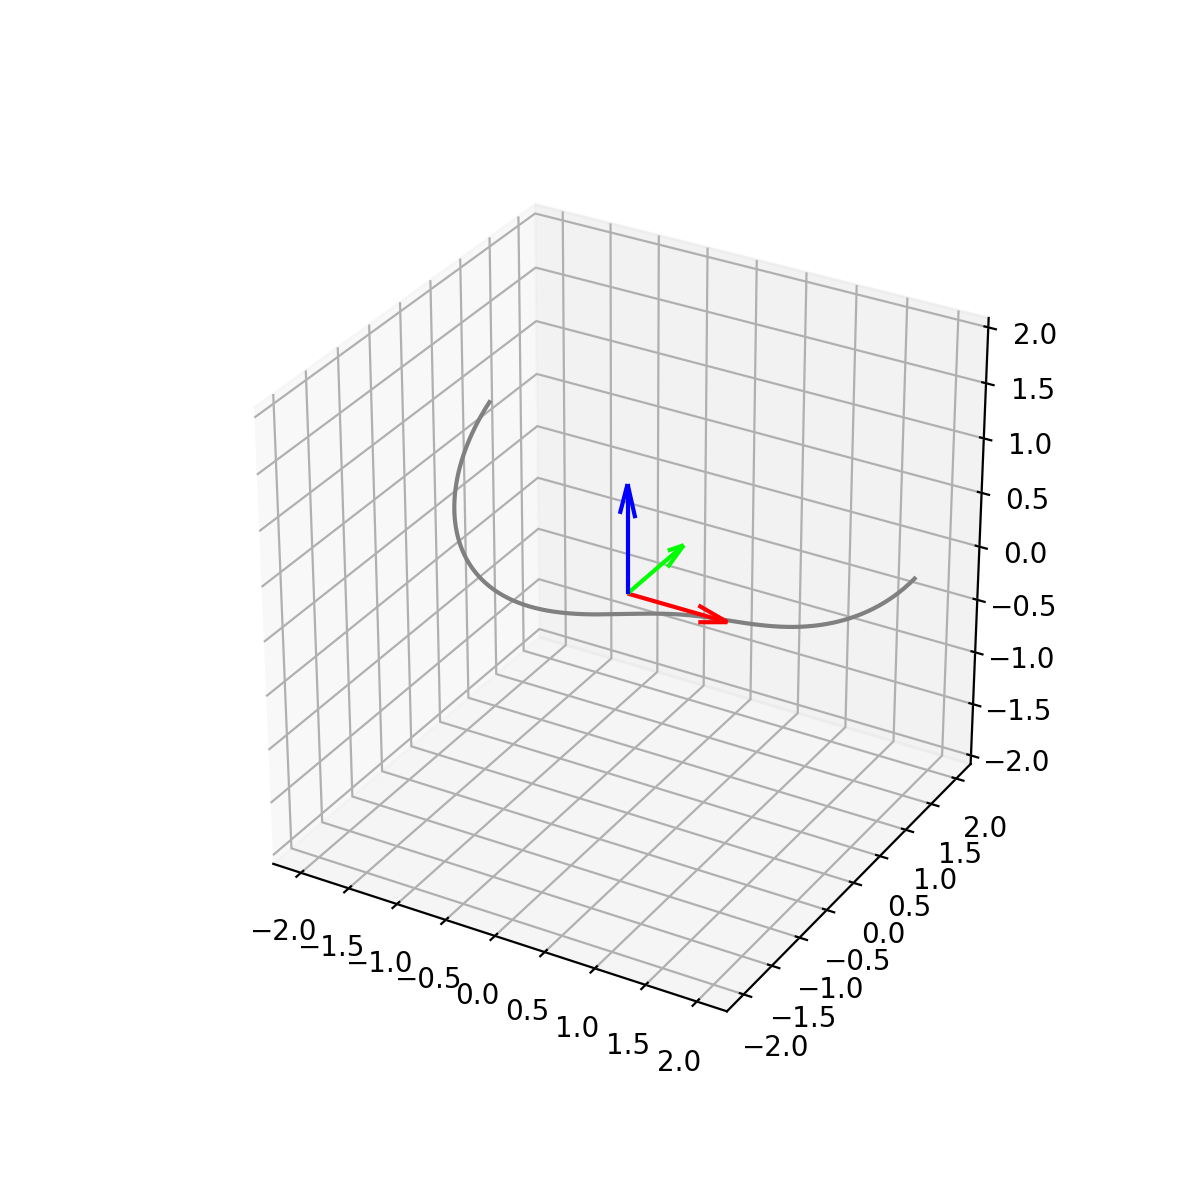

In [5]:
Path=CplrPathList[6]

#TRANSLATION
Translation=np.mean(Path,axis=0)
Trans_Path=Path-Translation

#SCALING
Scale=np.std(Trans_Path,axis=0)
Scale_Path=Trans_Path/np.max(Scale)

#ROTATION
Covariance_Mat=np.cov(Scale_Path,rowvar=0)
sing_vec=LA.svd(Covariance_Mat)[0]
R=sing_vec.T
Rot_Path=np.matmul(R,Scale_Path.T).T

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
Path2=Rot_Path
xline=Path2[:,0]
yline=Path2[:,1]
zline=Path2[:,2]
ax.plot3D(xline, yline, zline, 'gray')
limit=2
ax.auto_scale_xyz([-limit, limit], [-limit, limit], [-limit, limit])
plotXYZ(np.zeros((1, 3)), np.identity(3), ax)

